In [1]:
# 1. Load HF dataset & save raw CSVs
# ===========================
!pip install datasets -q


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# ===========================


from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset from HuggingFace
ds = load_dataset("Creatorin/solar_selected")

# Convert splits to pandas
train_df = ds["train"].to_pandas()
val_df   = ds["validation"].to_pandas()
test_df  = ds["test"].to_pandas()

# Save raw splits (optional but nice to keep)
train_df.to_csv("solar_train.csv", index=False)
val_df.to_csv("solar_val.csv", index=False)
test_df.to_csv("solar_test.csv", index=False)

print("Saved raw CSVs: solar_train.csv, solar_val.csv, solar_test.csv")

# ===========================
# 2. Load raw CSVs with pandas
# ===========================
train = pd.read_csv("solar_train.csv")
val   = pd.read_csv("solar_val.csv")
test  = pd.read_csv("solar_test.csv")

# Combine for some generic checks if you want
df = pd.concat([train, val, test], ignore_index=True)
print("Full df shape:", df.shape)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Saved raw CSVs: solar_train.csv, solar_val.csv, solar_test.csv
Full df shape: (73052, 51)


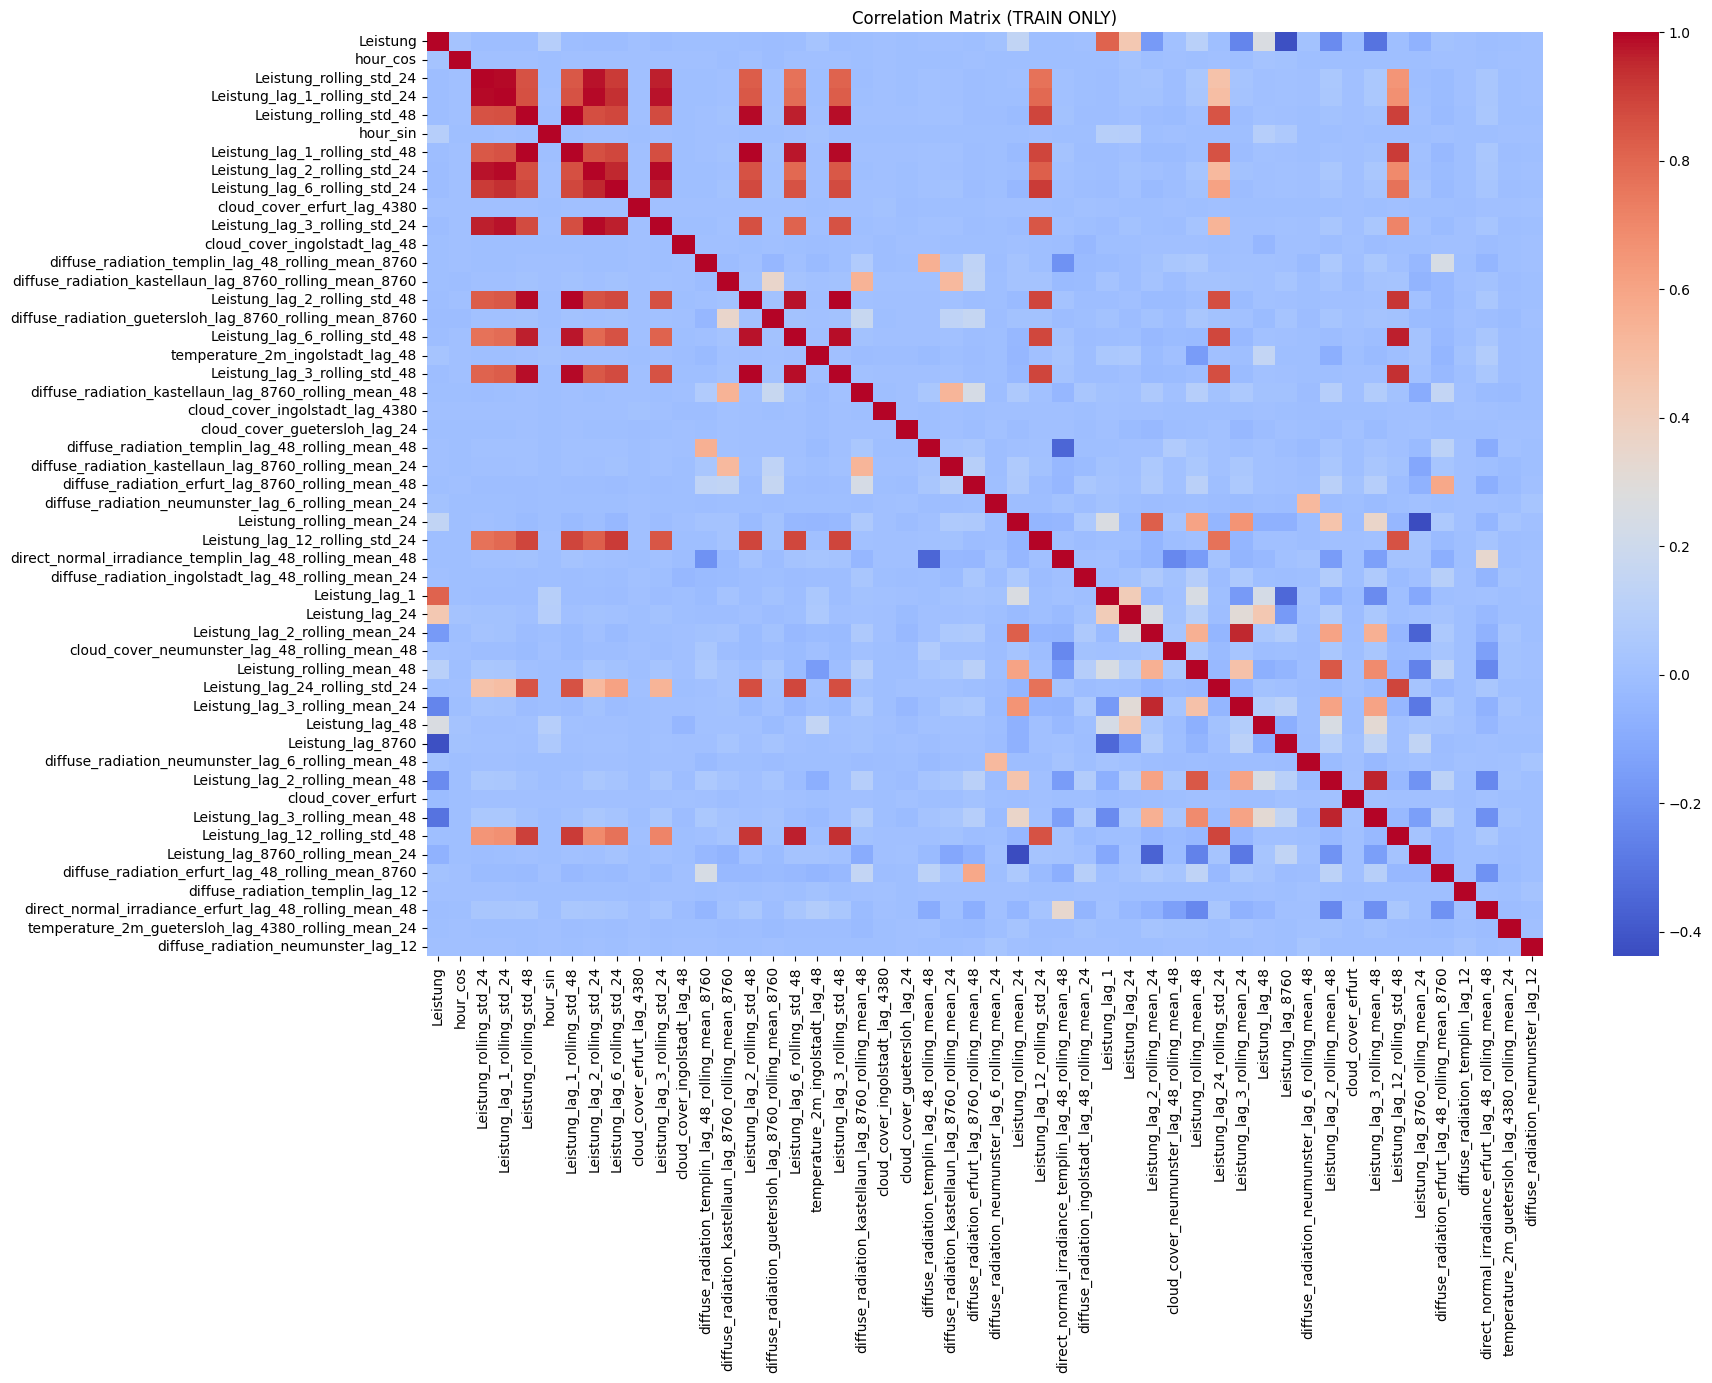

In [3]:
# ===========================
# 3. Correlation matrix (TRAIN ONLY)
# ===========================
train_numeric = train.select_dtypes(include=["number"])

plt.figure(figsize=(18, 12))
sns.heatmap(train_numeric.corr(), cmap="coolwarm")
plt.title("Correlation Matrix (TRAIN ONLY)")
plt.show()


Missing columns: []
Clean dataframe shape (all splits together): (73052, 21)
       Leistung      hour_sin  hour_cos  Leistung_lag_1  Leistung_lag_24  \
0  2.803215e-20  2.623963e-17  1.414202    1.121286e-19    -4.345078e-19   
1  2.803215e-20  3.660224e-01  1.366014    1.121286e-19    -4.345078e-19   
2  2.803215e-20  7.071010e-01  1.224735    1.121286e-19    -4.345078e-19   
3  2.803215e-20  9.999919e-01  0.999992    1.121286e-19    -4.345078e-19   
4  2.803215e-20  1.224735e+00  0.707101    1.121286e-19    -4.345078e-19   

   Leistung_lag_48  Leistung_rolling_mean_24  Leistung_rolling_mean_48  \
0     2.243829e-19                  0.000033                 -0.000136   
1     2.243829e-19                  0.000033                 -0.000136   
2     2.243829e-19                  0.000033                 -0.000136   
3     2.243829e-19                  0.000033                 -0.000136   
4     2.243829e-19                  0.000033                 -0.000136   

   Leistung_rolling_s

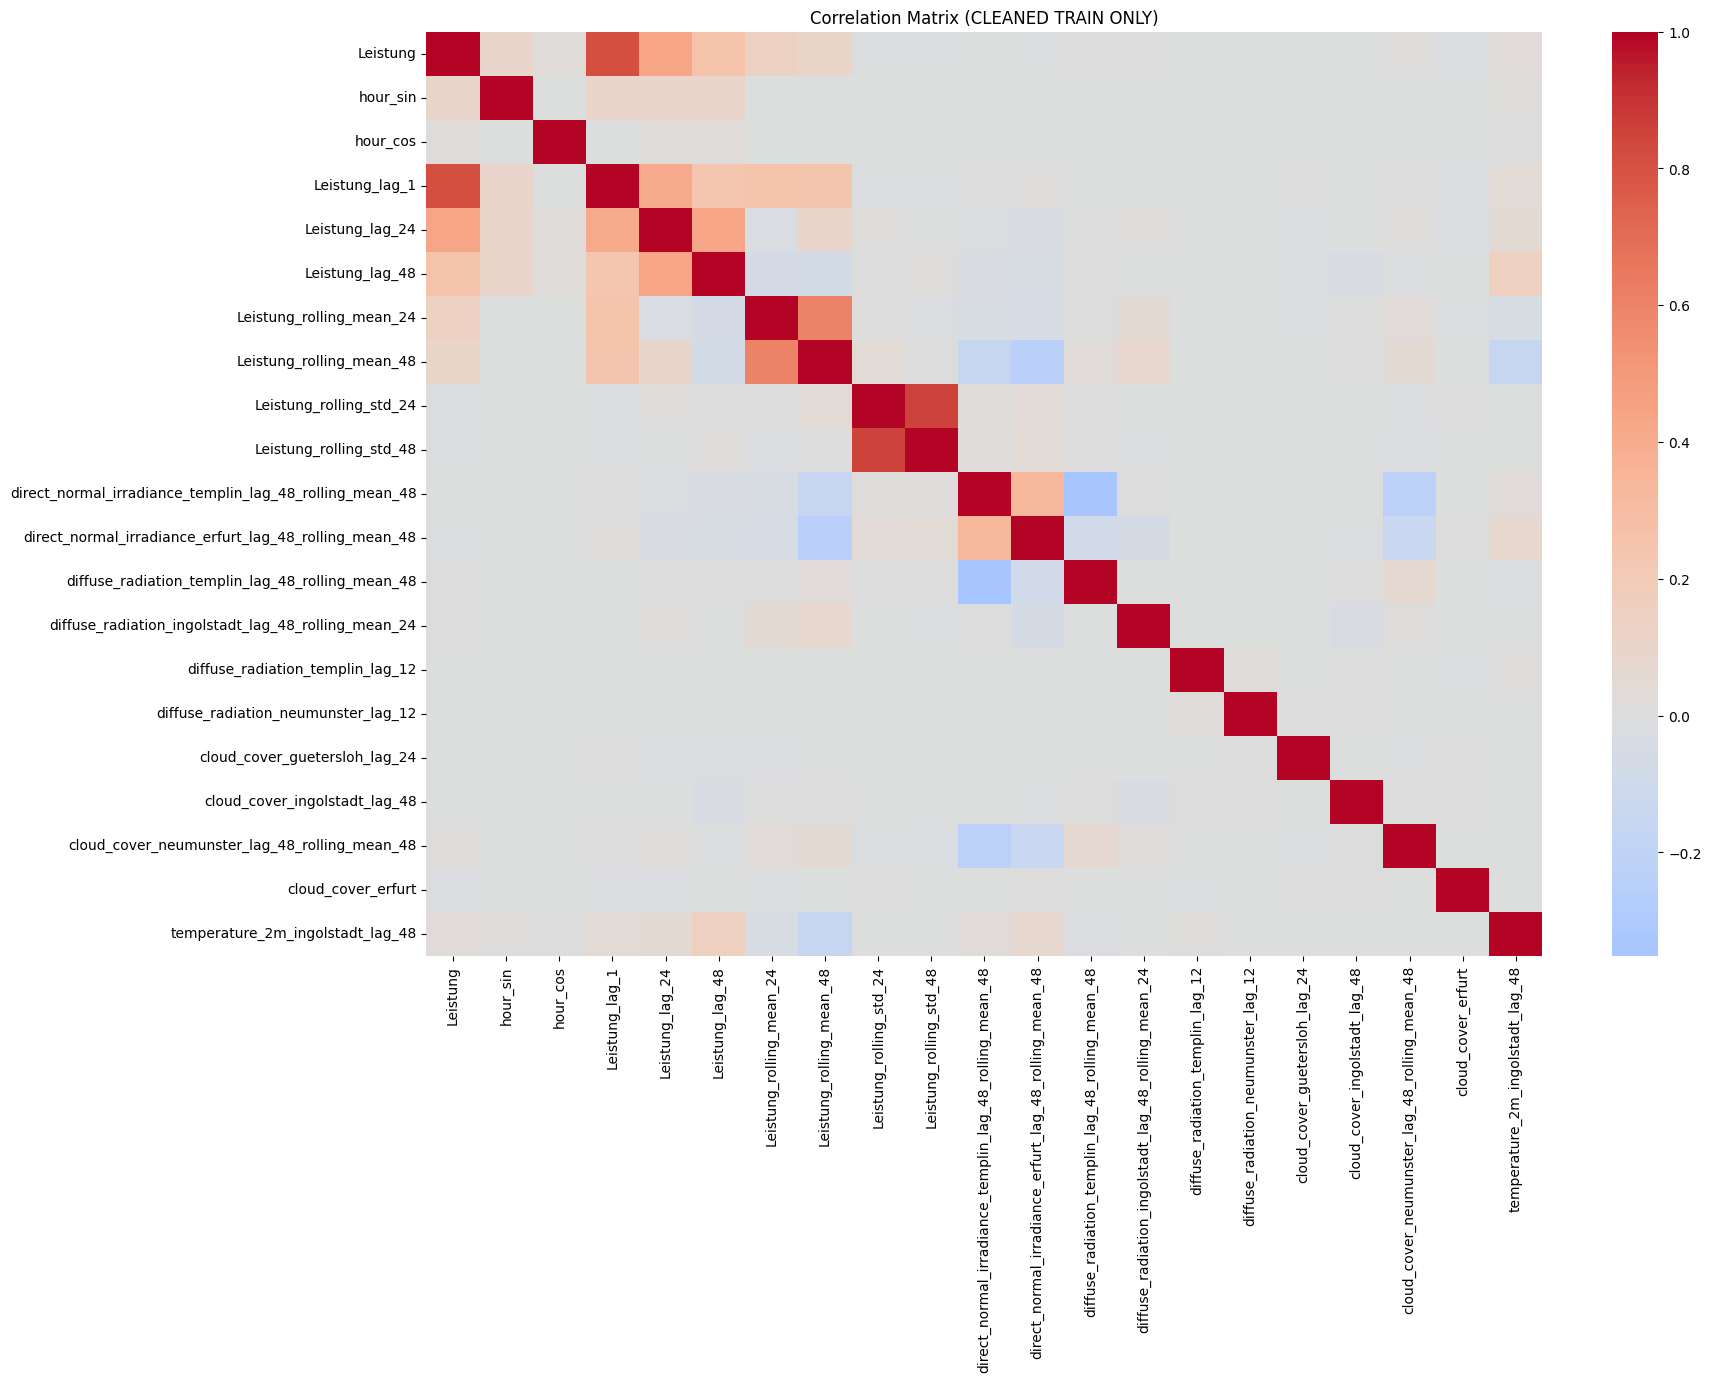

In [4]:



# ===========================
# 4. Select 20 features (based on analysis)
# ===========================
TARGET_COL = "Leistung"

selected_features = [
    # time of day
    "hour_sin",
    "hour_cos",

    # power history (lags + rolling)
    "Leistung_lag_1",
    "Leistung_lag_24",
    "Leistung_lag_48",
    "Leistung_rolling_mean_24",
    "Leistung_rolling_mean_48",
    "Leistung_rolling_std_24",
    "Leistung_rolling_std_48",

    # radiation
    "direct_normal_irradiance_templin_lag_48_rolling_mean_48",
    "direct_normal_irradiance_erfurt_lag_48_rolling_mean_48",
    "diffuse_radiation_templin_lag_48_rolling_mean_48",
    "diffuse_radiation_ingolstadt_lag_48_rolling_mean_24",
    "diffuse_radiation_templin_lag_12",
    "diffuse_radiation_neumunster_lag_12",

    # cloud cover
    "cloud_cover_guetersloh_lag_24",
    "cloud_cover_ingolstadt_lag_48",
    "cloud_cover_neumunster_lag_48_rolling_mean_48",
    "cloud_cover_erfurt",

    # temperature
    "temperature_2m_ingolstadt_lag_48",
]

# Sanity check
missing = [c for c in selected_features if c not in df.columns]
print("Missing columns:", missing)   # should be []

# ===========================
# 5. Build cleaned df with 20 features + target
# ===========================
keep_cols = [TARGET_COL] + selected_features
df_clean = df[keep_cols].copy()

print("Clean dataframe shape (all splits together):", df_clean.shape)
print(df_clean.head())

# ===========================
# 6. Split back into train / val / test (clean)
# ===========================
n_train = len(train)
n_val   = len(val)
n_test  = len(test)

train_clean = df_clean.iloc[:n_train].reset_index(drop=True)
val_clean   = df_clean.iloc[n_train:n_train + n_val].reset_index(drop=True)
test_clean  = df_clean.iloc[n_train + n_val:].reset_index(drop=True)

print("Train clean:", train_clean.shape)
print("Val clean  :", val_clean.shape)
print("Test clean :", test_clean.shape)

# ===========================
# 7. Correlation matrix for CLEANED TRAIN
# ===========================
train_clean_numeric = train_clean.select_dtypes(include=["number"])

plt.figure(figsize=(18, 12))
sns.heatmap(train_clean_numeric.corr(), cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix (CLEANED TRAIN ONLY)")
plt.show()

In [5]:


# ===========================
# 8. Save cleaned CSVs
# ===========================
train_clean.to_csv("solar_train_clean.csv", index=False)
val_clean.to_csv("solar_val_clean.csv", index=False)
test_clean.to_csv("solar_test_clean.csv", index=False)

print("Saved cleaned CSVs:")
print(" - solar_train_clean.csv")
print(" - solar_val_clean.csv")
print(" - solar_test_clean.csv")


Saved cleaned CSVs:
 - solar_train_clean.csv
 - solar_val_clean.csv
 - solar_test_clean.csv
